# SALARY PREDICTION BASED ON COUNTRY AND RACE


                The aim of this project to predict the salary of individuals from varied countries and races based on their demographics such as occupation, age, gender, experience, education, etc. The dataset is taken from Kaggle. The dataset has 8 independent variables and 1 target variable i.e Salary.

### Aboout the dataset

The dataset consists of a comprehensive collection of salary and demographic information with additional details on years of experience. It offers a valuable resource for studying the relationship between income and various socio-demographic factors. The demographic attributes include age, gender, education, country, and race, providing a diverse range of variables for analysis. Researchers can explore patterns and trends in income distribution across different demographic categories, allowing for insights into potential disparities or variations in earning potential. Moreover, the dataset incorporates the crucial dimension of years of experience, enabling investigations into the impact of professional tenure on salary levels. This aspect adds a dynamic aspect to the analysis, enabling researchers to examine how income varies based on both demographic characteristics and accumulated work experience. The dataset presents a rich opportunity for conducting comprehensive studies on income diversity and understanding the multifaceted factors influencing earning potential in today's workforce.

### Data Dictionary

|Column|Description|
|---|---|
|Unnamed: 0|Index|
|Age|Age of the employee|
|Education Level|Education level of the employee|
|Job Title|Job title of the employee|
|Years of Experience|Years of experience of the employee|
|Salary|Salary of the employee|
|Country|Country of the employee|
|Race|Race of the employee|

In [13]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#loading the data
df = pd.read_csv("C:/Users/HP/OneDrive/Desktop/data science/Salary Prediction/Salary.csv")
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


## Data Preprocessing

In [22]:
#checking the shape of the data
df.shape

(6704, 9)

In [24]:
#checking for null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

Since the number of rows with null/missing value is very less as compared to the total number of rows, I will be dropping these rows.

In [26]:
df.dropna(axis=0, inplace=True)

In [28]:
#checking for null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [55]:
#dropping column
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

In [57]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [30]:
#unique values in each column
df.nunique()

Unnamed: 0             6698
Age                      41
Gender                    3
Education Level           7
Job Title               191
Years of Experience      37
Salary                  444
Country                   5
Race                     10
dtype: int64

The job title column has 191 different values. It will be very difficult to analyze so many job titles. So, I will group the job titles under similar job domains.

In [ ]:
df['Job Title'].unique()

In [32]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [34]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In the dataset the education level is represented in two different ways : Bachelor and Bachelor degree, which means same. So I will be grouping it with Bachelor

In [36]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

In [38]:
#descriptive statistics
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000,6698.000000
mean,3351.922216,33.623022,8.095178,115329.253061
std,1934.949414,7.615784,6.060291,52789.792507
min,0.000000,21.000000,0.000000,350.000000
25%,1676.250000,28.000000,3.000000,70000.000000
50%,3352.500000,32.000000,7.000000,115000.000000
75%,5026.750000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [40]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the data and try to understand the data. I will begin by looking at the distribution of data across the datset, followed by visualizing the data to understand the relationship between the features and the target variable.

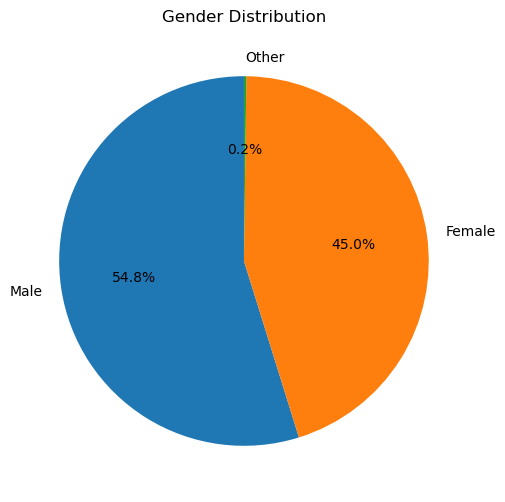

In [42]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

The pie chart shows that majority of the employees are male with 54.8 % on the dataset, followed by females with 45% and 0.2% employees belong to other gender.

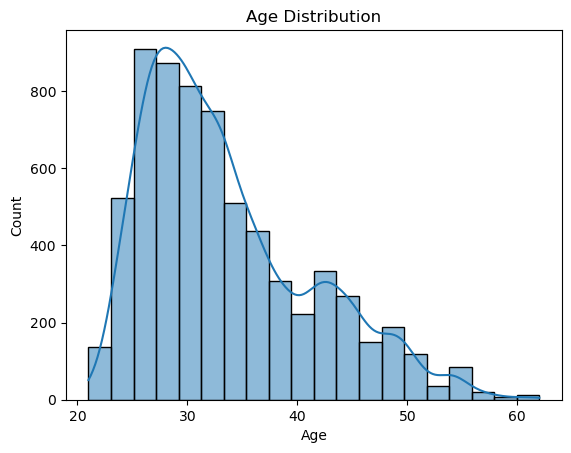

In [44]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

Majority of the employees are in the range of 25 - 35 years of age, which means majority of the employees are young and energetic. There is only minimal number of old employees in the dataset having age more than 55 years.

([0, 1, 2, 3],
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

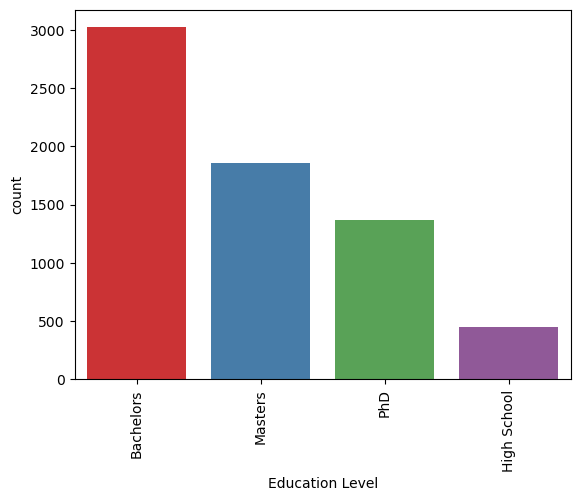

In [46]:
sns.countplot(x = 'Education Level', data = df,hue='Education Level', palette='Set1')
plt.xticks(rotation=90)

Most of the employees have a Bachelor's degree followed by Master's degree and Doctoral degree. The least number of employees have a High School education. From the graph it is clear that most of the employees started working after graduation, few of them started working after post graduation and very few of them have gone for doctorate. The least number of employees have started working after high school education.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

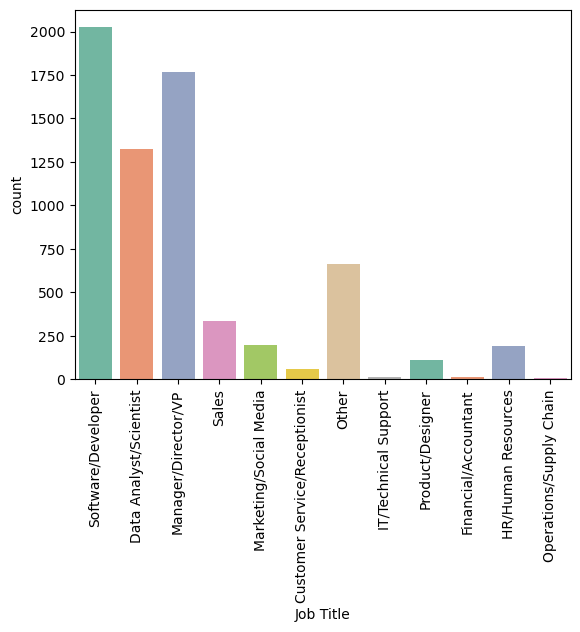

In [48]:
sns.countplot(x='Job Title', hue='Job Title',palette='Set2',data = df)
plt.xticks(rotation=90)

This graph helps us to breakdown the data of job title in a simpler form. From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/Vp. Few amount of employees have job titles such as sales, marketing/social media, HR, Product Designer and Customer Service. Very few of the eomployees work as a Financial/accountant or operation/supply management.

From this I build a hypothesis that the job titles such as Software Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/accountant or operation/supply management and Customer Service are in less demand and paid comparatively less.

<Axes: xlabel='Years of Experience', ylabel='Count'>

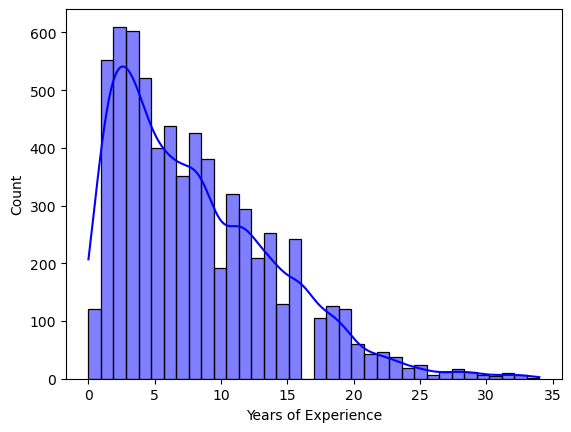

In [50]:
sns.histplot(x = 'Years of Experience', color='blue',data = df,kde=True)

Most of the employees in the dataset havr experience of 0-7 years in the respective domains in which particularly majority of them have experience between less than 5 years. Moreover the number of employees in the dataset decreases with increasing number of years of experience.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

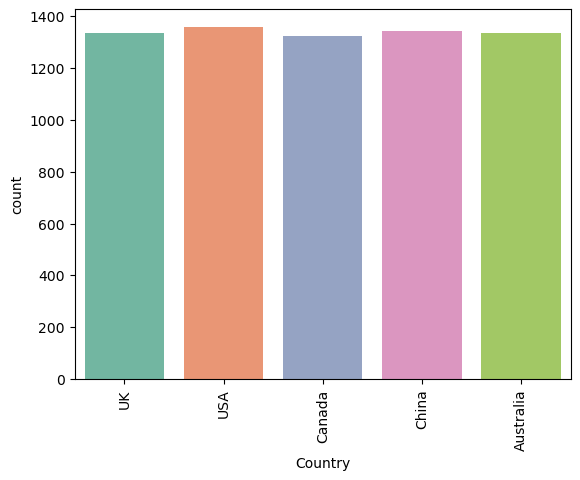

In [52]:
sns.countplot(x='Country',hue='Country',palette='Set2', data=df)
plt.xticks(rotation=90)

    The number of employees from the above 5 countries is nearly same, with a little more in USA.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

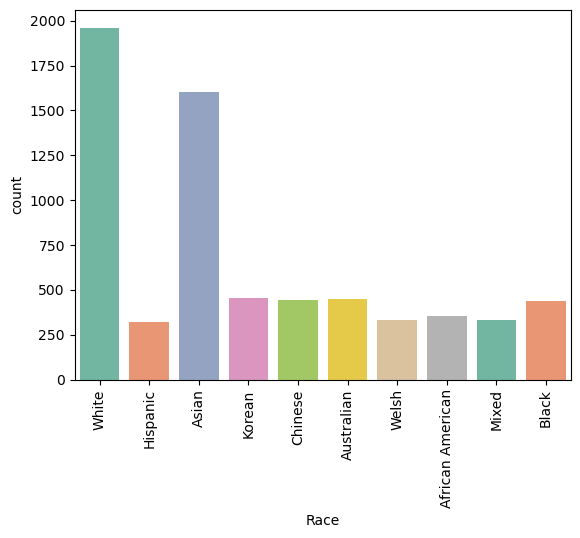

In [54]:
sns.countplot(x='Race',hue='Race',palette='Set2', data=df)
plt.xticks(rotation=90)

This graph help us to know about the racial distribution in the dataset. From the graph, it is clear that most of the employees are either White or Asian, followed by Korean, Chinese, Australian and Black. Number of employees from Welsh, African American, Mixed and Hispanic race are less as compared to other groups.

From all the above plots and graphs, we can a understanding about the data we are dealing with, its distribution and quantity as well. Now I am gonna explore the realtion of these independent variables with the target Variable i.e. Salary.

Text(0.5, 1.0, 'Age vs Salary')

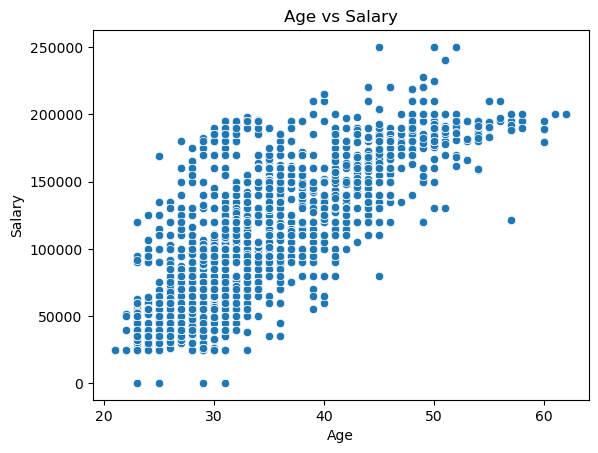

In [56]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

In this scatter plot we see a trend that the salary of the person increases with increse in the age, which is obvious because of promotion and apprisals. However upon closer observation we can find that similar age have multiple salaries, which means there are other factors which decides the salary.

Text(0.5, 1.0, 'Gender vs Salary')

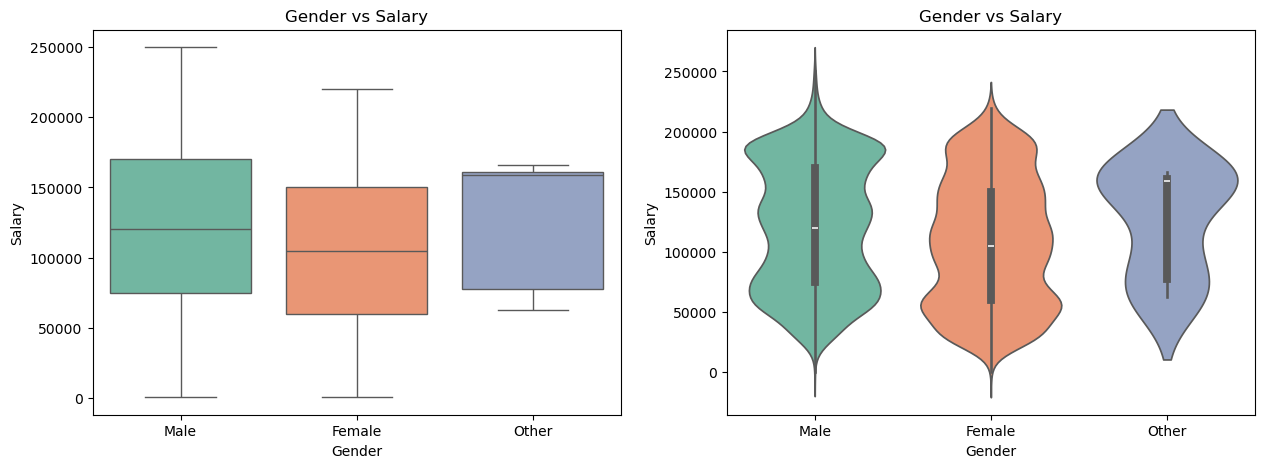

In [60]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, hue='Gender', palette='Set2', ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, hue='Gender', palette='Set2', ax =ax[1]).set_title('Gender vs Salary')

The boxplot and violinplot describes the salary distribution among the three genders. In the boxplot the employees from Other gender has quite high salary as compared to Makes and Females. The other gender employees have a median salary above 150000, followed by males with median salary near 107500 and females with median salary near 100000. The voilin plot visualizes the distribution of salary with respect to the gender, where most of the Other gender employees have salary above 150000. In makes this distribution is concentrated between 50000 and 10000 as well as near 200000. In case of females, there salary distribution is quite spread as compared to other genders with most near 50000.

Text(0.5, 1.0, 'Education Level vs Salary')

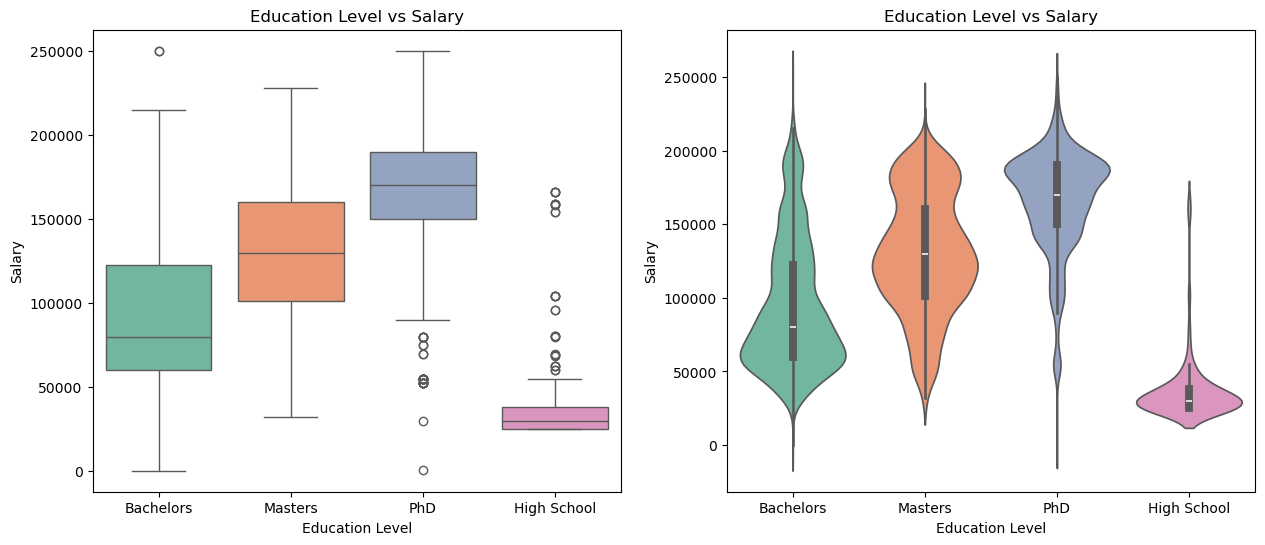

In [62]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary',hue='Education Level', palette='Set2', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary',hue='Education Level',palette='Set2', data = df, ax=ax[1]).set_title('Education Level vs Salary')

The boxplot and violinplot shows the distribution of salary based on the employees education level. The median salary for the Phd holders is highest followed by Masters and bachelors degreee holders, with employees with no degree having the lowest median salary. In the violinplot the phd scholars have distribution near 200000, whereas Masters degree holders have a very sleak distribution where the salary distribution is spread from 100k to 150k, The Bachelors degree holders have a salary distribution near 50000 whereas the employees with no degree have a salary distribution near 40k-45k.

From these graph, I assume that the employees with higher education level have higher salary than the employees with lower education level.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

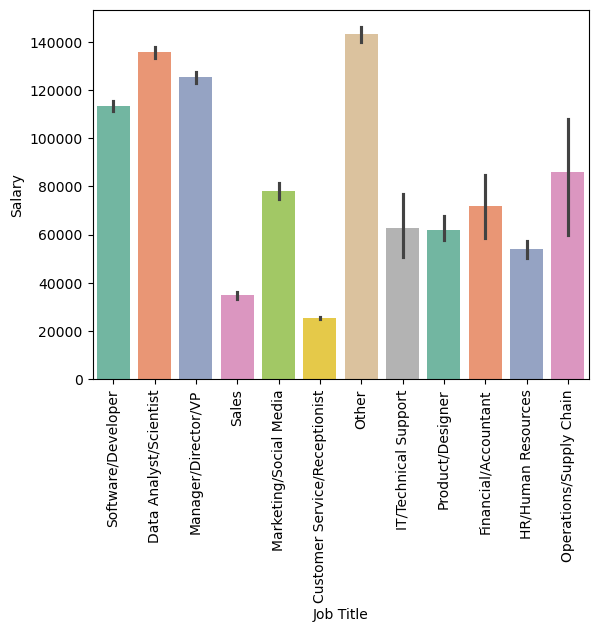

In [64]:
sns.barplot(x = 'Job Title', y = 'Salary', data = df, hue='Job Title',palette = 'Set2')
plt.xticks(rotation = 90)

This graph falsifies my previous hypothesis regarding the demand and paywith respect to job titles. In this graph, 'Other' category job titles have higher salary than those titles which assumed to be in high demand and pay. In contrast to previous Job title graph, this graph shows that there is no relation between the job title distribution and salary. The job titles which gave high salary are found to be less in number.

However the hypothesis is true about the Job titles such as Software Developer, Data analyst/scuentust and Manager/Director/VP. These job titles are found to be in high demand and pay. But in contrast to that the job titles such as Operation/Supply chain, HR, Financial/Accountant and Marketing/Social Media are found have much more salary as assumed.

Text(0.5, 1.0, 'Years of Experience vs Salary')

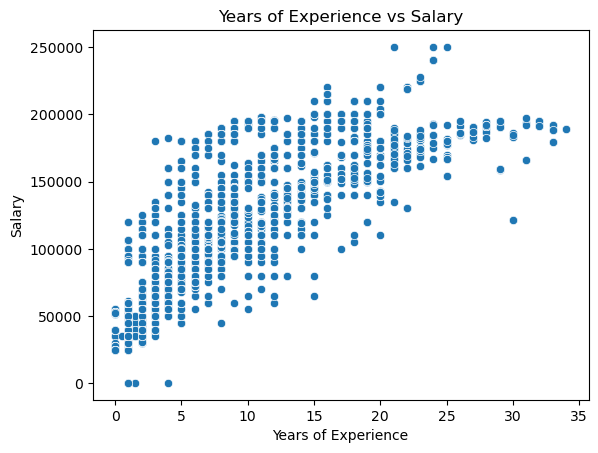

In [66]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary')

From this scaaterplot, it is clear that on the whole, the salary of the employees is increasing with the years of experience. However, on closer look we can see that similar experience have different salaries. This is because the salary is also dependent on other factors like job title, age, gender education level as discussed earlier.

<Axes: xlabel='Country', ylabel='Salary'>

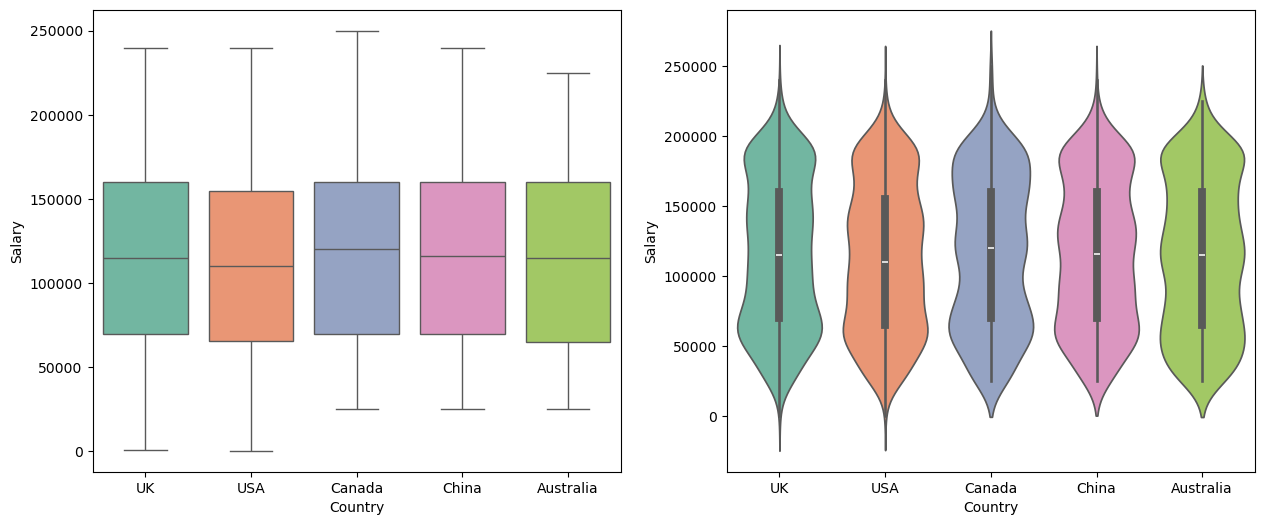

In [68]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary',hue='Country', palette='Set2', data = df, ax=ax[0])
sns.violinplot(x = 'Country', y = 'Salary',hue='Country', palette='Set2', data = df, ax=ax[1])

Both the boxplot and violinplot shows very similar insight about the salary across all the countiries even in the violinplot distribution. However, there is very small variation in median salary in USA, which is slighlty less as compared to other countries.

Since, the we cannot get much information about the salary with respect to the countries. So, I will plot the job title vs salary graph for each country, so that we can get a overview of job title vs salary for each country.

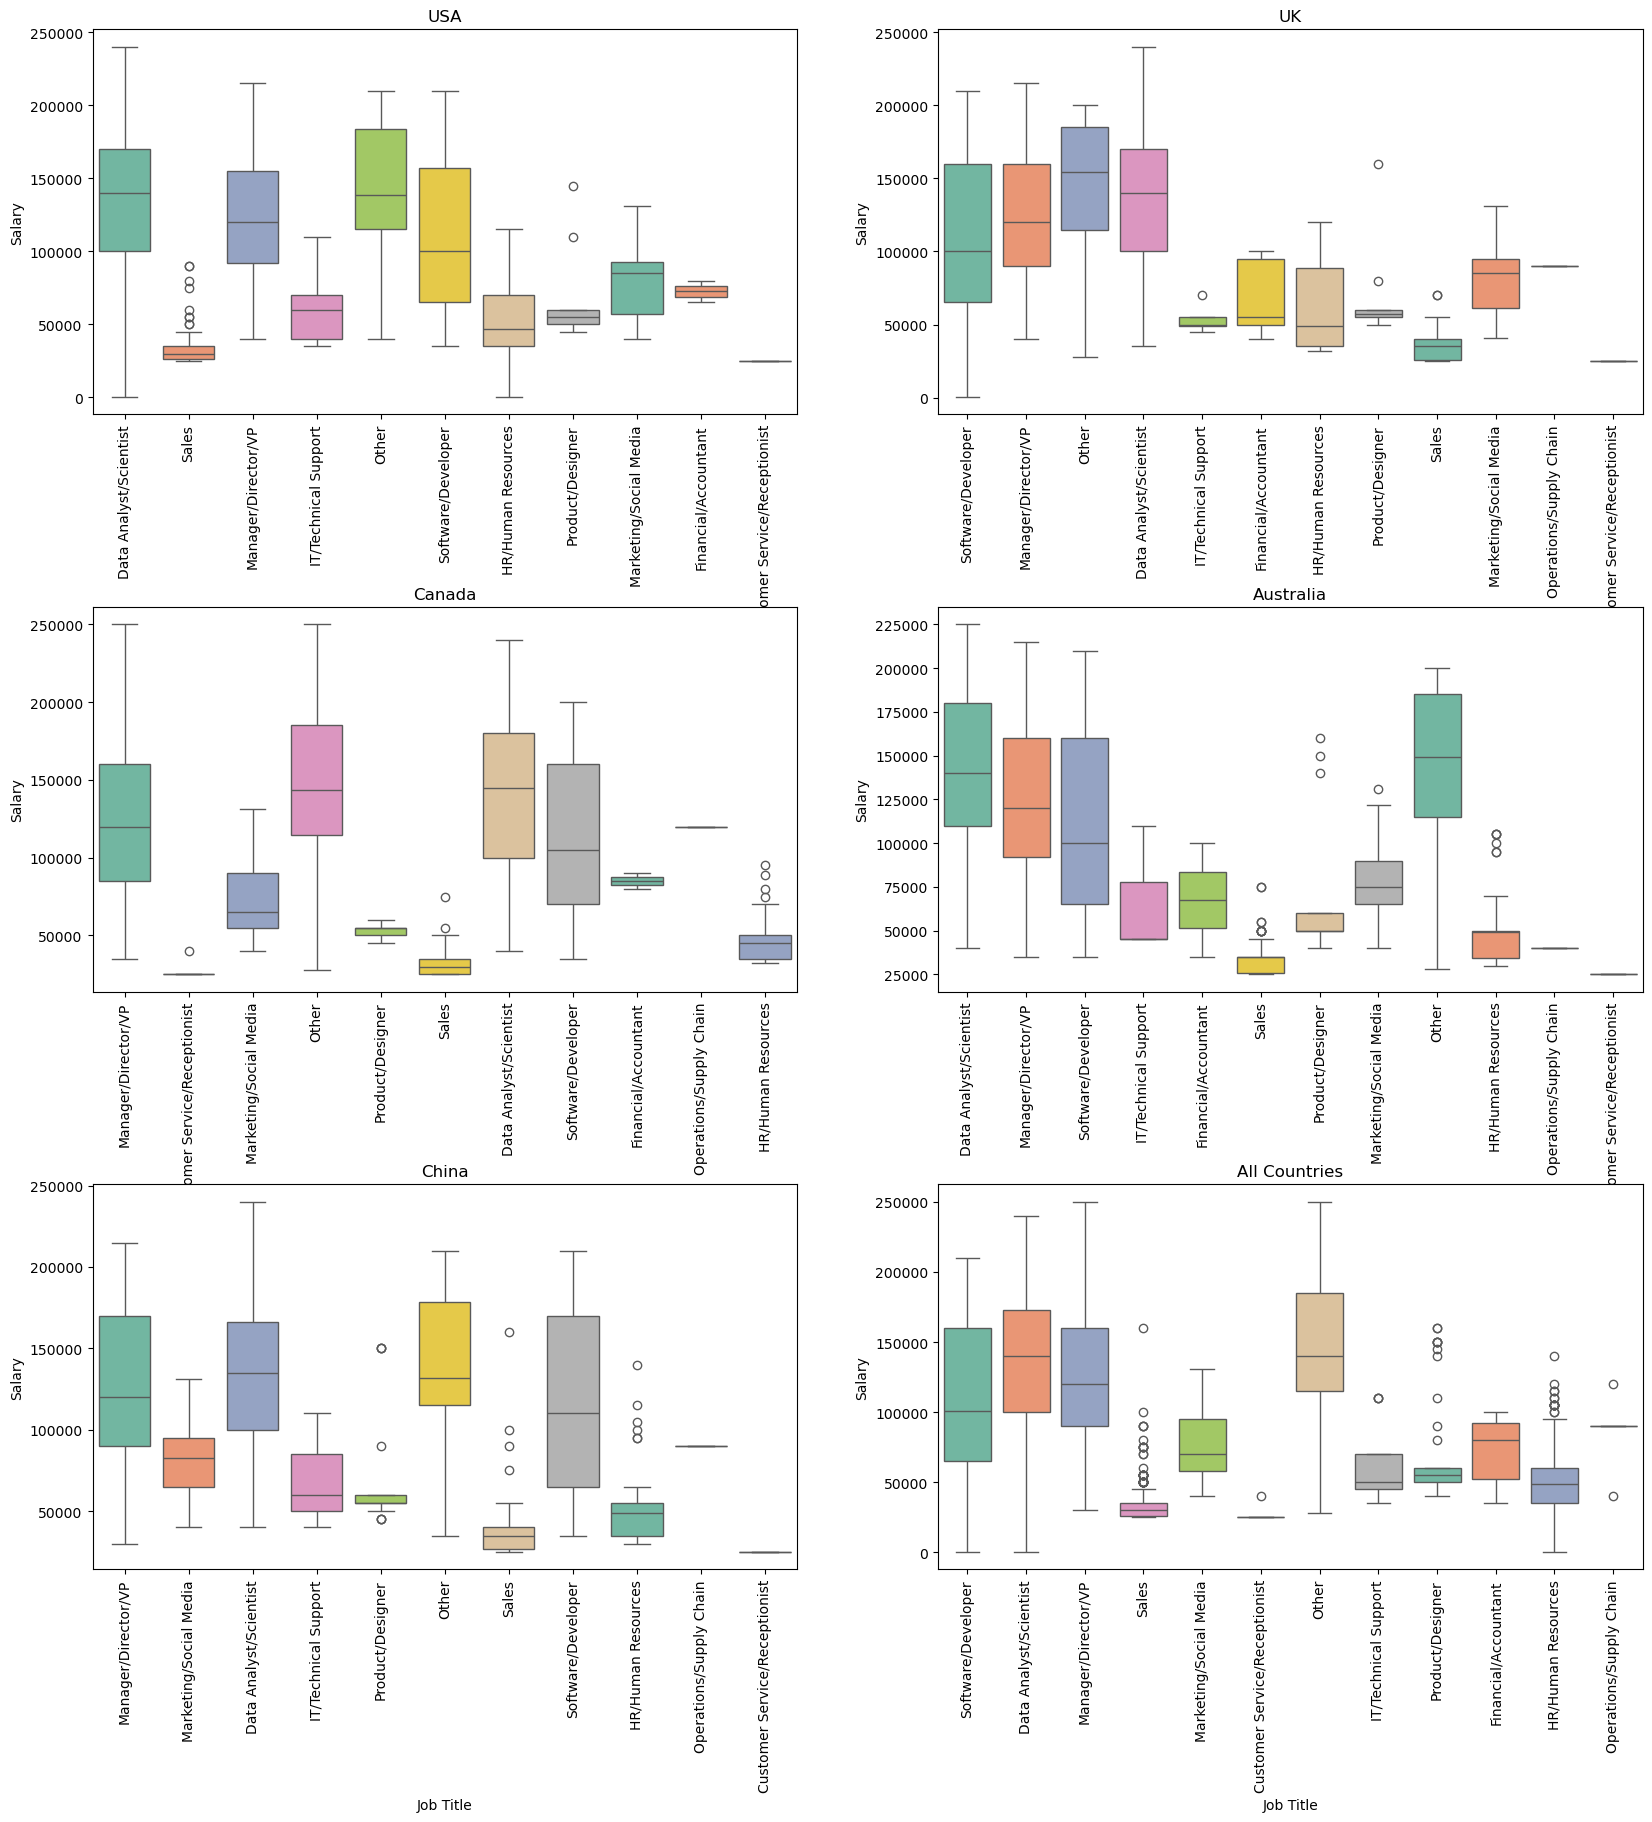

In [72]:
ig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', hue='Job Title', palette='Set2', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary',  hue='Job Title', palette='Set2', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', hue='Job Title', palette='Set2', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', hue='Job Title', palette='Set2', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', hue='Job Title', palette='Set2', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary',  hue='Job Title', palette='Set2',data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

After observing all these plots, I conclude that the Job Titles such as Softwarre Developer, Manager/Director/VP and Data Analyst/Scientist hare in high demand as well as receive much higer salary than other job titles, excluding the Job Titles that come under 'Other' category. The job titles such as Operation/Supply Chain, Customer Service/Receptionist, Product Designer and sales are in low demand and have low salary.

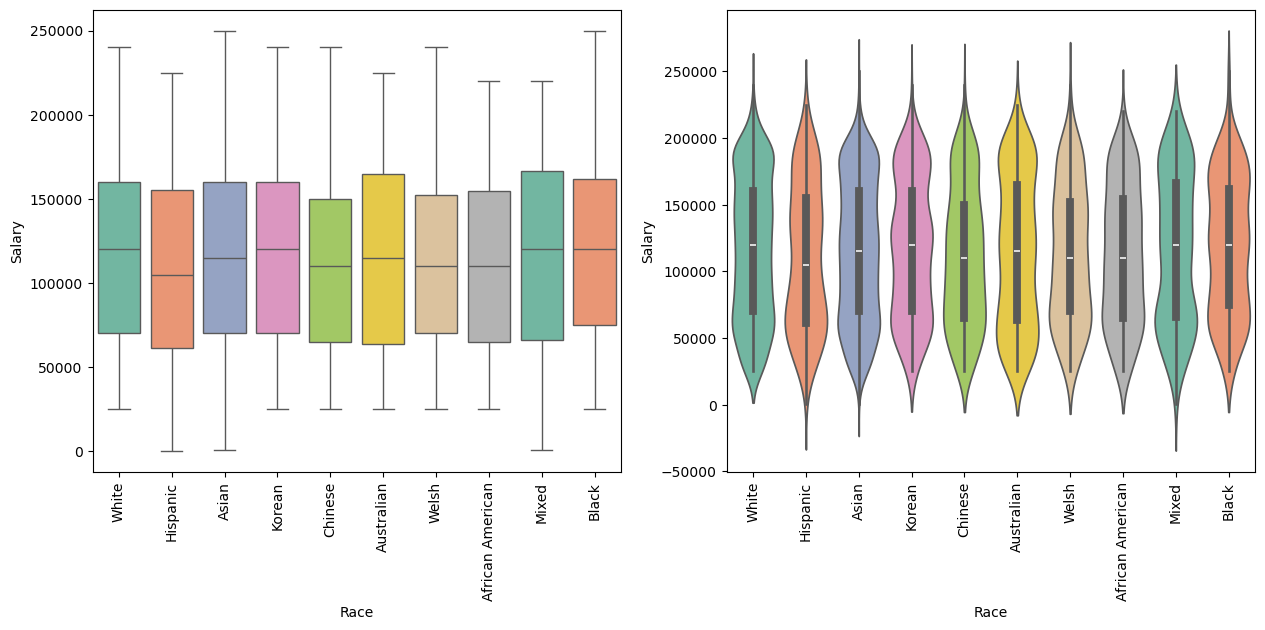

In [74]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', hue='Race',palette='Set2', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', hue='Race',palette='Set2', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)


The employees from the races - Australian, Mixed, Blacks and White have the highest median salary, followed by Asian, Korean and Chinese with lowest median salary in employees from hispanic race. Looking at the violinplot the salary distribution is more concentrated after 150k in white, australian, black and mixed race. Whereas the hispanic has more concentration near 75k

## Data Preprocessing 2

### Label encoding to categorical features

In [111]:
# Identify categorical columns
categorical_cols = ['Gender', 'Education Level', 'Job Title', 'Country', 'Race']

# Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


    Age  Gender  Education Level  Job Title  Years of Experience    Salary  \
0  32.0       1                0         11                  5.0   90000.0   
1  28.0       0                2          1                  3.0   65000.0   
2  45.0       1                3          5                 15.0  150000.0   
3  36.0       0                0         10                  7.0   60000.0   
4  52.0       1                2          5                 20.0  200000.0   

   Country  Race  
0        3     9  
1        4     5  
2        1     9  
3        4     5  
4        4     1  


### Feature Selection

In [123]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [125]:
# Select features and target
X = df.drop(columns=['Salary'])   # Features
y = df['Salary']                 # Target variable

### Feature Scaling

In [127]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-Test Split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model 1: Linear Regression

In [131]:
# Initialize and Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [133]:
# Predict on Test Set
y_pred_lr = lr.predict(X_test)


In [135]:
# Evaluate Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print("Linear Regression R2 Score:", r2_lr)
print("Linear Regression MSE:", mse_lr)

Linear Regression R2 Score: 0.6868026870792092
Linear Regression MSE: 893069374.5509099


In [145]:
#predicting the salary of an employee 
l_pred = lr.predict(X_test)

In [149]:
# After predicting using Linear Regression
lr_pred = lr.predict(X_test)  # Predicted salaries from Linear Regression

# Create a DataFrame comparing Actual and Predicted values
dft = pd.DataFrame({'Actual': y_test, 'Predicted': lr_pred})

# Reset index for clean display
dft.reset_index(drop=True, inplace=True)

# Display first 10 results
print(dft.head(10))


     Actual      Predicted
0  150000.0  121652.042136
1   75969.0   90270.658720
2  100000.0   76065.501618
3   60000.0   77891.995070
4   80000.0   91002.087924
5  190000.0  127644.756899
6   72000.0   97722.474383
7   55000.0   77501.223710
8  195000.0  143401.258081
9  130000.0  127164.224819


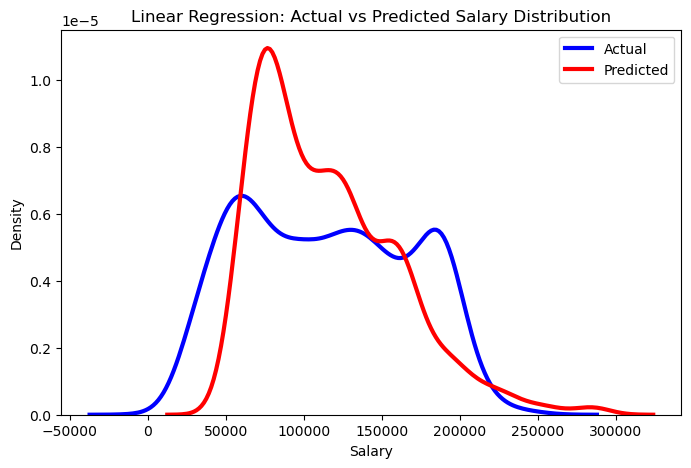

In [151]:
# Plot KDE comparison
plt.figure(figsize=(8,5))
ax = sns.kdeplot(dft['Actual'], color='blue', linewidth=3, label='Actual')
sns.kdeplot(dft['Predicted'], color='red', linewidth=3, label='Predicted', ax=ax)

plt.title('Linear Regression: Actual vs Predicted Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are not close to the actual values.. This shows that the model is a not good fit.

### Random Forest Regressor

In [153]:
# Initialize and Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [155]:
# Predict on Test Set
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest R2 Score:", r2_rf)
print("Random Forest MSE:", mse_rf)

Random Forest R2 Score: 0.9470637687576999
Random Forest MSE: 150945506.1595614


In [157]:
rf_pred = rf.predict(X_test)  # Predicted salaries from Random Forest

# Create DataFrame
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': rf_pred})

dfr.reset_index(drop=True, inplace=True)

print(dfr.head(10))


     Actual      Predicted
0  150000.0  149243.645833
1   75969.0   77479.600000
2  100000.0  100000.000000
3   60000.0   60000.000000
4   80000.0   81020.833333
5  190000.0  194670.833333
6   72000.0   72654.000000
7   55000.0   56701.904762
8  195000.0  196402.297619
9  130000.0  131661.369048


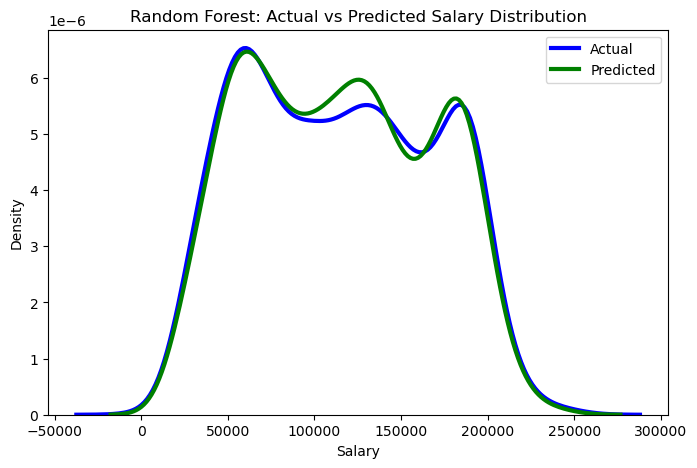

In [159]:
plt.figure(figsize=(8,5))
ax = sns.kdeplot(dfr['Actual'], color='blue', linewidth=3, label='Actual')
sns.kdeplot(dfr['Predicted'], color='green', linewidth=3, label='Predicted', ax=ax)

plt.title('Random Forest: Actual vs Predicted Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend()
plt.show()


The blue shows the distribution count for actual values and the red line shows the distribution count for predicted values. The predicted values are close to the actual values and ther curve coincides with the actual values curve. This shows that the model is a good fit.

In [161]:
print("\nModel Comparison:")
print("Linear Regression => R2: {:.4f}, MSE: {:.4f}".format(r2_lr, mse_lr))
print("Random Forest    => R2: {:.4f}, MSE: {:.4f}".format(r2_rf, mse_rf))


Model Comparison:
Linear Regression => R2: 0.6868, MSE: 893069374.5509
Random Forest    => R2: 0.9471, MSE: 150945506.1596


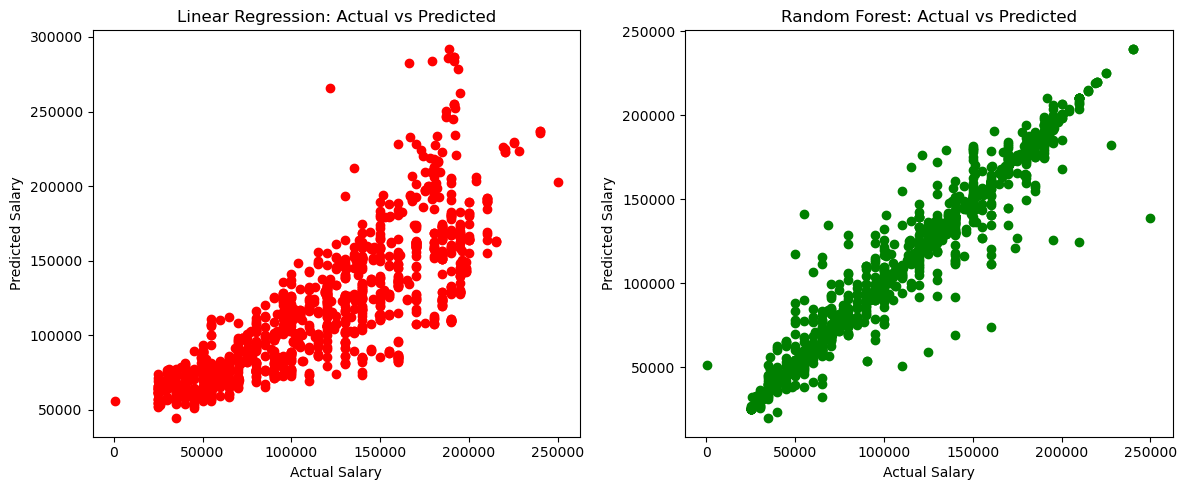

In [163]:
plt.figure(figsize=(12,5))

# Linear Regression plot
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, color='red')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Linear Regression: Actual vs Predicted')

# Random Forest plot
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Conclusion

From the exploratory data analysis, I have concluded that the salary of the employees is dependent upon the following factors:
1. **Years of Experience**
2. **Job Title**
3. **Education Level**

Employees with greater years of experience, having job title such as Data analyst/scientist, Software Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, I have used regressor models - Linear Regression and Random Forest Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.6%

                                                  THANK YOU !!